In [335]:
import matplotlib.pyplot as plt
import numpy as np

In [336]:
# global constant variables
# these variables are set or calculated once
# and should never change again

# set the seed for number generator
# so every run is the same
np.random.seed(0)

timestep = 0.1
# will round to as many decimal places as are in the timestep variable
precision = len(str(timestep).split('.')[-1])

# how long the simulation runs
duration = 12
# time between doses given
dose_period = 12
# how long each dose lasts
dose_length = 1

# amount of drug given
dose = 275

# elimination rate
k_el = 1 #0.01 + 0.03125*50
# volume of distribution
v_d = 1 #0.2806 * 70

# variance of measurement error
meas_var = 1
# variance of dosage error
dose_var = 1
# variance of model error
model_var = 1
# variance of timing error
time_var = 1

# times at which each measurement is taken
meas_times = [1, 11]

In [337]:
# global state variables
# these are the variables that change as the program runs

# the current time step
t_k = 0
# the current drug amount
x_k = 0

# where all time steps are stored used for plotting
ts = []
# where all drug amounts are stored for plotting and meta analysis
xs = []
# where measurements are stored
ys = []
# where measurement times are stored
yts = []

In [338]:
def x_j(x_i, t_j, k_el):
    if t_j == 0:
        return x_i
    
    else:
        t_i = round(t_j - timestep, precision)
        Phi_i = Phi(t_i, k_el)
        Gamma_i = Gamma(t_i, k_el)
        u_i = u(t_i)
        
        M_i = M(t_i, k_el)
        D_i = Gamma_i
        T_i = 1
        
        w1 = w(t_i, model_var)
        w2 = w(t_i, dose_var)
        w3 = w(t_i, time_var)
        
        return Phi_i*x_i + Gamma_i*u_i + M_i*w1 + D_i*w2 + T_i*w3
    
def Phi(t, k_el):
    A = -k_el
    Delta_k = timestep
    
    return np.exp(A * Delta_k) 

def Gamma(t, k_el):
    return (1-np.exp(-k_el*timestep))/k_el

def u(t):
    return dose*Chi(t)

def Chi(t):
    t_i = round(dose_period * (t // dose_period), precision)
    t_j = round(t_i + dose_length, precision)
    
    if t_i <= t < t_j:
        return 1
    
    else: 
        return 0

def W(t, k_el):
    return 1

def w(t, var):
    return np.random.normal(0, var)

def M(t, k_el):
    return W(t, k_el) * np.sqrt(timestep)
    
def y(k_el, v_d):
    # observations are at the mercy of the state variables
    # so they cannot be given as input
    global t_k
    global x_k
    
    C_k = C(t_k, k_el, v_d)
    V_k = V(t_k, k_el, v_d)
    v_k = v(t_k)
    
    return C_k*x_k + V_k*v_k

def C(t, k_el, v_d):
    return 1/v_d

def V(t, k_el, v_d):
    return 1

def v(t):
    return np.random.normal(0, meas_var)

In [339]:
for i in range(int(duration/timestep)):
    x = x_j(x_k, t_k, k_el)
    
    x_k = x  
    
    ts.append(t_k)
    xs.append(x_k)
    print(t_k)
    if t_k in meas_times:
        ys.append(y(k_el, v_d))
        yts.append(t_k)
    
    t_k = round(timestep

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5000000000000002
1.6000000000000003
1.7000000000000004
1.8000000000000005
1.9000000000000006
2.0000000000000004
2.1000000000000005
2.2000000000000006
2.3000000000000007
2.400000000000001
2.500000000000001
2.600000000000001
2.700000000000001
2.800000000000001
2.9000000000000012
3.0000000000000013
3.1000000000000014
3.2000000000000015
3.3000000000000016
3.4000000000000017
3.5000000000000018
3.600000000000002
3.700000000000002
3.800000000000002
3.900000000000002
4.000000000000002
4.100000000000001
4.200000000000001
4.300000000000001
4.4
4.5
4.6
4.699999999999999
4.799999999999999
4.899999999999999
4.999999999999998
5.099999999999998
5.1999999999999975
5.299999999999997
5.399999999999997
5.4999999999999964
5.599999999999996
5.699999999999996
5.799999999999995
5.899999999999995
5.999999999999995
6.099999999999994
6.199999999999994
6.299999999

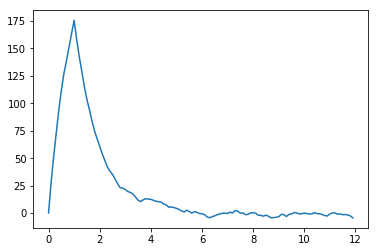

In [340]:
plt.plot(ts, xs)
plt.plot(yts, ys, 'ro')

#plt.axhline(y=7, color='red', ls='--')
#plt.axhline(y=1.5, color='red', ls='--')

In [341]:
print(ys)

[]
